# 1. Set up and load the data

In [1]:
# Set up the required imports.

import time
from functools import partial
from multiprocessing import Pool, cpu_count

import decoupler as dc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pertpy as pt
import scanpy as sc
from scipy import stats

from typing import Dict, Tuple, Optional

/home/ktsukanov/repositories/PerturbationCatalogue/data_exploration/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define dataset name.

# DATASET = 'adamson_2016_pilot_curated'
# DATASET = 'adamson_2016_upr_epistasis_curated'
DATASET = 'adamson_2016_upr_perturb_seq_curated'
# DATASET = 'datlinger_2017_curated'

In [3]:
# Load the h5ad file.

adata = sc.read_h5ad(f'{DATASET}.h5ad')

In [4]:
# Overview of the file.

adata

AnnData object with n_obs × n_vars = 62623 × 32738
    obs: 'perturbation_name', 'perturbed_target_number', 'perturbed_target_ensg', 'perturbed_target_symbol', 'perturbed_target_category', 'perturbation_type_label', 'perturbation_type_id', 'timepoint', 'treatment_label', 'treatment_id', 'model_system_label', 'model_system_id', 'species', 'tissue_label', 'tissue_id', 'cell_type_label', 'cell_type_id', 'cell_line_label', 'cell_line_id', 'sex_label', 'sex_id', 'developmental_stage_label', 'developmental_stage_id', 'disease_term_label', 'disease_term_id'
    var: 'ensembl_gene_id', 'symbol'

In [5]:
# High level look at the observations.

adata.obs

,perturbation_name,perturbed_target_number,perturbed_target_ensg,perturbed_target_symbol,perturbed_target_category,perturbation_type_label,perturbation_type_id,timepoint,treatment_label,treatment_id,...,cell_type_label,cell_type_id,cell_line_label,cell_line_id,sex_label,sex_id,developmental_stage_label,developmental_stage_id,disease_term_label,disease_term_id
cell_barcode,,,,,,,,,,,,,,,,,,,,,
AAACATACAAGATG,63(mod)_pBA580,1,control,control,control,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
AAACATACACCTAG,OST4_pDS353,1,ENSG00000228474,OST4,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
AAACATACTTCCCG,SEC61A1_pDS031,1,ENSG00000058262,SEC61A1,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
AAACATTGAAACAG,EIF2B4_pDS491,1,ENSG00000115211,EIF2B4,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
AAACATTGCAGCTA,SRPR_pDS482,1,ENSG00000182934,SRPRA,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCATGCTTTAC,STT3A_pDS011,1,ENSG00000134910,STT3A,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
TTTGCATGGAGGAC,ARHGAP22_pDS458,1,ENSG00000128805,ARHGAP22,protein_coding,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996
TTTGCATGTAGAGA,63(mod)_pBA580,1,control,control,control,CRISPRi,NaN,P0DT0H0M0S,NaN,NaN,...,lymphoblast,CL:0017005,K 562 cell,CLO:0007050,NaN,NaN,NaN,NaN,"chronic myelogenous leukemia, BCR-ABL1 positive",MONDO:0011996


In [6]:
# High level look at the genes.

adata.var

,ensembl_gene_id,symbol
ensembl_gene_id,,
ENSG00000243485,ENSG00000243485,MIR1302-2HG
ENSG00000237613,ENSG00000237613,FAM138A
ENSG00000186092,ENSG00000186092,OR4F5
ENSG00000238009,ENSG00000238009,RP11-34P13.7
ENSG00000239945,ENSG00000239945,RP11-34P13.8
...,...,...
ENSG00000215635,ENSG00000215635,AC145205.1
ENSG00000268590,ENSG00000268590,BAGE5
ENSG00000251180,ENSG00000251180,CU459201.1


# 2. Perturbed genes statistics

Total number of distinct perturbed genes: 90
First 10 perturbed genes: ['OST4', 'SEC61A1', 'EIF2B4', 'SRPRA', 'IER3IP1', 'YIPF5', 'HARS1', 'PRELID3B', 'DAD1', 'TIMM23']


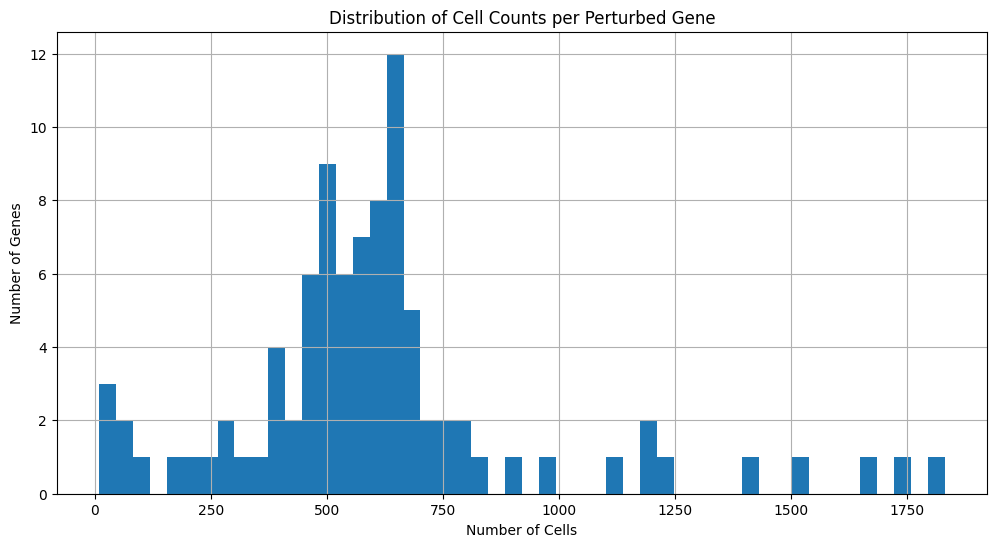


Statistics of cells per perturbed gene:
count      90.000000
mean      614.755556
std       342.476877
min        10.000000
25%       469.250000
50%       588.500000
75%       678.250000
max      1830.000000
Name: count, dtype: float64


In [7]:
# Get all unique perturbation targets (including 'control')
all_targets = adata.obs['perturbed_target_symbol'].unique()

# Filter out 'control' to get only perturbed genes
perturbed_targets = [t for t in all_targets if t != 'control']
num_perturbed_genes = len(perturbed_targets)

print(f"Total number of distinct perturbed genes: {num_perturbed_genes}")
print("First 10 perturbed genes:", perturbed_targets[:10])

# Count number of cells per perturbed gene
target_counts = adata.obs['perturbed_target_ensg'].value_counts()

# Remove 'control' from the counts for plotting
perturbation_counts = target_counts[target_counts.index != 'control']

# Plot histogram
plt.figure(figsize=(12, 6))
perturbation_counts.hist(bins=50)
plt.title('Distribution of Cell Counts per Perturbed Gene')
plt.xlabel('Number of Cells')
plt.ylabel('Number of Genes')
plt.grid(True)
plt.show()

# Show some statistics
print("\nStatistics of cells per perturbed gene:")
print(perturbation_counts.describe())

# 3. Cell type statistics

Total number of distinct cell types: 1
All cell types: ['lymphoblast']
Categories (1, object): ['lymphoblast']


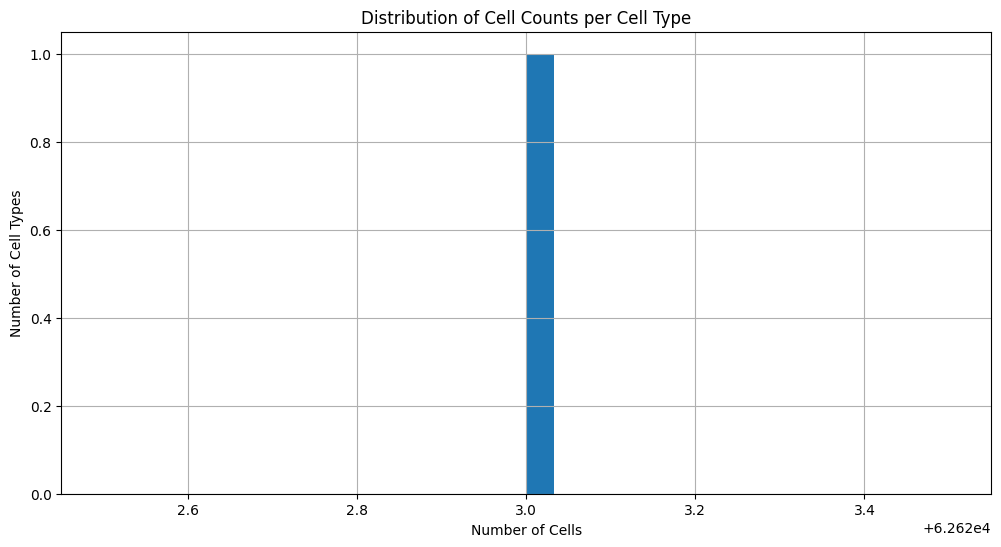

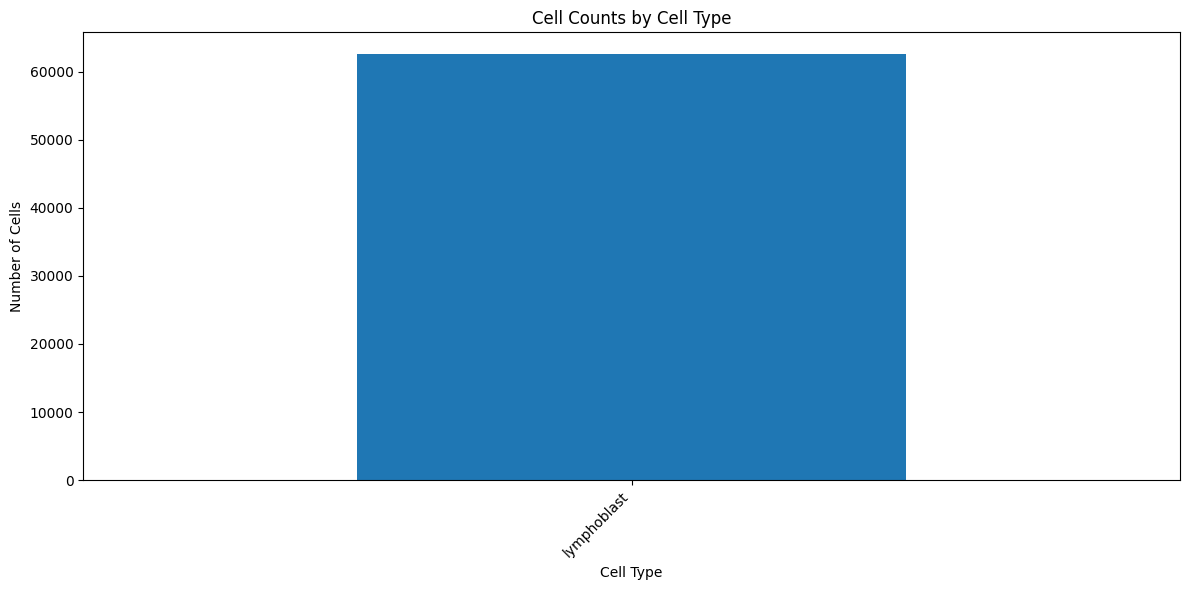


Statistics of cells per cell type:
count        1.0
mean     62623.0
std          NaN
min      62623.0
25%      62623.0
50%      62623.0
75%      62623.0
max      62623.0
Name: count, dtype: float64

Complete cell type distribution:
cell_type_label
lymphoblast    62623
Name: count, dtype: int64


In [8]:
# Get all unique cell types
cell_types = adata.obs['cell_type_label'].unique()
num_cell_types = len(cell_types)

print(f"Total number of distinct cell types: {num_cell_types}")
print("All cell types:", cell_types)

# Count number of cells per cell type
cell_type_counts = adata.obs['cell_type_label'].value_counts()

# Plot histogram
plt.figure(figsize=(12, 6))
cell_type_counts.hist(bins=30)
plt.title('Distribution of Cell Counts per Cell Type')
plt.xlabel('Number of Cells')
plt.ylabel('Number of Cell Types')
plt.grid(True)
plt.show()

# Plot as bar chart for better readability
plt.figure(figsize=(12, 6))
cell_type_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Cell Counts by Cell Type')
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show some statistics
print("\nStatistics of cells per cell type:")
print(cell_type_counts.describe())

# Show the complete distribution
print("\nComplete cell type distribution:")
print(cell_type_counts)

# 4. Levels of expression of control genes

Original data shape: (62623, 32738)
Control data shape: (7295, 32738)
Number of genes: 32738
Mean expression range: 0.0000 to 261.1331


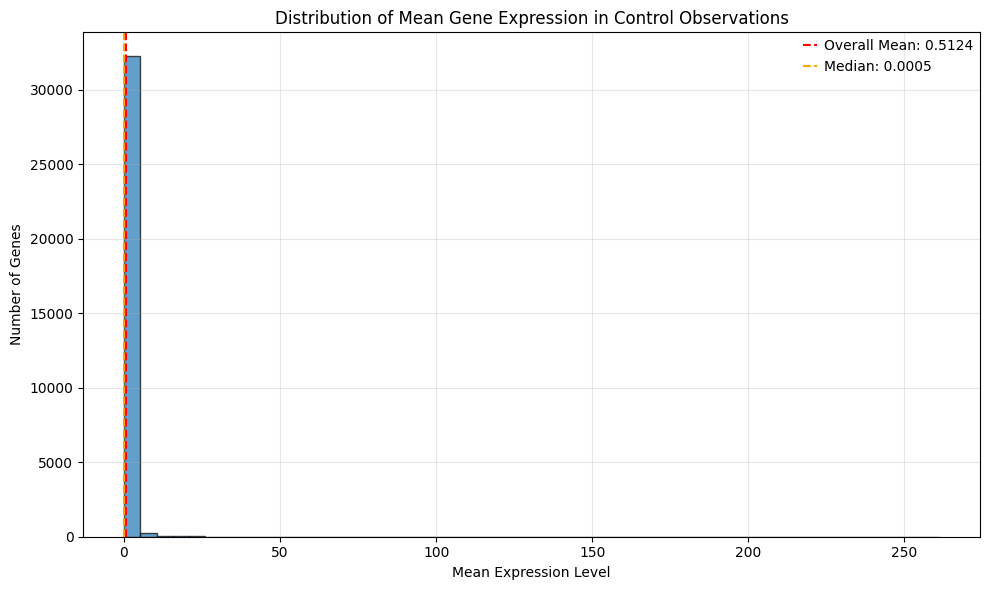


Summary statistics for mean gene expression:
Mean: 0.5124
Median: 0.0005
Standard deviation: 4.6179
25th percentile: 0.0000
75th percentile: 0.1073

No common housekeeping genes found in the dataset.
Available gene names (first 20): ['MIR1302-2HG', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8', 'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2', 'RP4-669L17.10', 'OR4F29', 'RP4-669L17.2', 'RP5-857K21.15', 'RP5-857K21.1', 'RP5-857K21.2', 'RP5-857K21.3', 'RP5-857K21.4', 'RP5-857K21.5', 'OR4F16', 'RP11-206L10.3']
You may need to check the gene naming convention (e.g., ENSEMBL IDs vs gene symbols)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Filter adata to keep only control observations
control_mask = adata.obs['perturbed_target_symbol'] == 'control'
adata_control = adata[control_mask, :].copy()

print(f"Original data shape: {adata.shape}")
print(f"Control data shape: {adata_control.shape}")

# Calculate mean expression per gene across control observations
mean_expression = np.array(adata_control.X.mean(axis=0)).flatten()

print(f"Number of genes: {len(mean_expression)}")
print(f"Mean expression range: {mean_expression.min():.4f} to {mean_expression.max():.4f}")

# Create histogram of mean gene expression values
plt.figure(figsize=(10, 6))
plt.hist(mean_expression, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Mean Expression Level')
plt.ylabel('Number of Genes')
plt.title('Distribution of Mean Gene Expression in Control Observations')
plt.grid(True, alpha=0.3)

# Add some summary statistics to the plot
plt.axvline(np.mean(mean_expression), color='red', linestyle='--', 
           label=f'Overall Mean: {np.mean(mean_expression):.4f}')
plt.axvline(np.median(mean_expression), color='orange', linestyle='--', 
           label=f'Median: {np.median(mean_expression):.4f}')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Print some summary statistics
print(f"\nSummary statistics for mean gene expression:")
print(f"Mean: {np.mean(mean_expression):.4f}")
print(f"Median: {np.median(mean_expression):.4f}")
print(f"Standard deviation: {np.std(mean_expression):.4f}")
print(f"25th percentile: {np.percentile(mean_expression, 25):.4f}")
print(f"75th percentile: {np.percentile(mean_expression, 75):.4f}")

# Find a highly expressed housekeeping gene
housekeeping_genes = ['ACTB', 'GAPDH', 'B2M', 'HPRT1', 'TBP', 'RPLP0', 'RPL13A', 
                     'PPIA', 'YWHAZ', 'GUSB', 'TFRC', 'PGK1', 'LDHA', '18S', 'TUBB']

# Check which housekeeping genes are present in the data
available_hk_genes = []
for gene in housekeeping_genes:
    if gene in adata_control.var.symbol:
        gene_idx = adata_control.var.symbol.get_loc(gene)
        mean_expr = mean_expression[gene_idx]
        available_hk_genes.append((gene, mean_expr))

if available_hk_genes:
    # Sort by mean expression and pick the highest one
    available_hk_genes.sort(key=lambda x: x[1], reverse=True)
    selected_gene, selected_mean = available_hk_genes[0]
    
    print(f"\nAvailable housekeeping genes and their mean expression:")
    for gene, expr in available_hk_genes:
        print(f"  {gene}: {expr:.4f}")
    
    print(f"\nSelected highly expressed housekeeping gene: {selected_gene} (mean: {selected_mean:.4f})")
    
    # Get expression values for the selected gene across all control cells
    gene_idx = adata_control.var.symbol.get_loc(selected_gene)
    # Handle both sparse and dense matrices
    if hasattr(adata_control.X, 'toarray'):
        # Sparse matrix
        gene_expression = adata_control.X[:, gene_idx].toarray().flatten()
    else:
        # Dense matrix
        gene_expression = np.array(adata_control.X[:, gene_idx]).flatten()
    
    # Plot distribution of the selected housekeeping gene
    plt.figure(figsize=(10, 6))
    plt.hist(gene_expression, bins=50, alpha=0.7, edgecolor='black', color='skyblue')
    plt.xlabel('Expression Level')
    plt.ylabel('Number of Cells')
    plt.title(f'Distribution of {selected_gene} Expression in Control Cells')
    plt.grid(True, alpha=0.3)
    
    # Add summary statistics to the plot
    plt.axvline(np.mean(gene_expression), color='red', linestyle='--', 
               label=f'Mean: {np.mean(gene_expression):.4f}')
    plt.axvline(np.median(gene_expression), color='orange', linestyle='--', 
               label=f'Median: {np.median(gene_expression):.4f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics for the selected gene
    print(f"\nSummary statistics for {selected_gene} expression:")
    print(f"Mean: {np.mean(gene_expression):.4f}")
    print(f"Median: {np.median(gene_expression):.4f}")
    print(f"Standard deviation: {np.std(gene_expression):.4f}")
    print(f"Min: {np.min(gene_expression):.4f}")
    print(f"Max: {np.max(gene_expression):.4f}")
    print(f"Number of cells: {len(gene_expression)}")
    
else:
    print(f"\nNo common housekeeping genes found in the dataset.")
    print("Available gene names (first 20):", list(adata_control.var.symbol[:20]))
    print("You may need to check the gene naming convention (e.g., ENSEMBL IDs vs gene symbols)")

# 5. Pseudobulk differential expression

In [10]:
def _compute_ttest_chunk(args):
    """Helper function for parallel t-test computation"""
    X_control, X_perturbed, gene_indices = args
    pvalues = []
    
    for gene_idx in gene_indices:
        control_vals = X_control[:, gene_idx]
        perturbed_vals = X_perturbed[:, gene_idx]
                
        try:
            _, pval = stats.ttest_ind(perturbed_vals, control_vals)
            pvalues.append(pval)
        except:
            pvalues.append(1.0)
    
    return pvalues

In [11]:
def compute_pseudobulk_perturbation_analysis(
    adata, 
    perturbation_col: str = "perturbed_target_symbol",
    control_label: str = "control",  # or "non-targeting", adjust as needed
    min_cells_per_group: int = 10,
    log_transform: bool = True,
    n_jobs: int = -1,
    chunk_size: int = 500,
    min_expression_threshold: float = 10.0
) -> pd.DataFrame:
    """
    Compute pseudobulk analysis for perturbation data with parallel processing.
    
    Parameters:
    -----------
    adata : AnnData
        Annotated data object with perturbation expression results
    perturbation_col : str
        Column name in adata.obs containing perturbation target symbols
    control_label : str
        Label used for control/non-targeting samples
    min_cells_per_group : int
        Minimum number of cells required per perturbation group
    log_transform : bool
        Whether to log-transform the data before analysis
    n_jobs : int
        Number of parallel jobs (-1 for all cores)
    chunk_size : int
        Number of genes to process per chunk in parallel
    min_expression_threshold : float
        Minimum pseudobulk control expression to include gene in analysis
        
    Returns:
    --------
    pd.DataFrame
        Results with columns: perturbation, gene, log2fc, pvalue, padj, mean_control, mean_perturbed
    """
    
    start_time = time.time()
    print(f"Starting pseudobulk analysis...")
    print(f"Dataset shape: {adata.shape}")
    
    # Check if perturbation column exists
    if perturbation_col not in adata.obs.columns:
        raise ValueError(f"Column '{perturbation_col}' not found in adata.obs")
    
    print(f"✓ Found perturbation column: {perturbation_col}")
    
    # Get expression data
    print("📊 Loading expression data...")
    if hasattr(adata.X, 'toarray'):
        X = adata.X.toarray()  # Convert sparse to dense if needed
        print("  Converted sparse matrix to dense")
    else:
        X = adata.X
    
    # Log transform if requested and data doesn't appear to be log-transformed
    if log_transform and np.max(X) > 20:  # Simple check for non-log data
        print("🔄 Applying log1p transformation...")
        X = np.log1p(X)
        print("  ✓ Log transformation complete")
    else:
        print("  Data appears already log-transformed or log_transform=False")
    
    # Get perturbation labels
    print("🏷️  Processing perturbation labels...")
    perturbations = adata.obs[perturbation_col].values
    unique_perturbations = np.unique(perturbations)
    print(f"  Found {len(unique_perturbations)} unique perturbations")
    
    # Filter out perturbations with too few cells
    print(f"🔍 Filtering perturbations (min {min_cells_per_group} cells)...")
    valid_perturbations = []
    for pert in unique_perturbations:
        cell_count = np.sum(perturbations == pert)
        if cell_count >= min_cells_per_group:
            valid_perturbations.append(pert)
            print(f"  ✓ {pert}: {cell_count} cells")
        else:
            print(f"  ✗ Skipping {pert}: only {cell_count} cells")
    
    if control_label not in valid_perturbations:
        raise ValueError(f"Control label '{control_label}' not found or has too few cells")
    
    print(f"✓ Will analyze {len(valid_perturbations)} perturbations")
    
    # Compute pseudobulk (mean expression per perturbation)
    print("🧮 Computing pseudobulk (mean expression per perturbation)...")
    pseudobulk_data = {}
    for i, pert in enumerate(valid_perturbations):
        print(f"  Processing {i+1}/{len(valid_perturbations)}: {pert}")
        mask = perturbations == pert
        pseudobulk_data[pert] = np.mean(X[mask, :], axis=0)
    
    # Convert to DataFrame for easier handling
    pseudobulk_df = pd.DataFrame(pseudobulk_data, index=adata.var.symbol)
    print(f"✓ Pseudobulk computed. Shape: {pseudobulk_df.shape}")
    
    # Set up parallel processing
    if n_jobs == -1:
        n_jobs = cpu_count()
    print(f"⚡ Setting up parallel processing with {n_jobs} cores")
    
    # Compute statistics for each perturbation vs control
    print("📈 Computing differential expression statistics...")
    results = []
    control_expression = pseudobulk_df[control_label].values
    num_of_controls = len(control_expression)
    control_mask = perturbations == control_label
    X_control = X[control_mask, :]
    
    # Filter genes by expression threshold
    print(f"🔍 Filtering genes with control expression > {min_expression_threshold}")
    
    # Apply log1p to threshold if data was log-transformed
    if log_transform and np.max(X) <= 20:  # Data was log-transformed
        threshold_to_use = np.log1p(min_expression_threshold)
        print(f"  Using log1p-adjusted threshold: {threshold_to_use:.3f} (original: {min_expression_threshold})")
    else:
        threshold_to_use = min_expression_threshold
        print(f"  Using original threshold: {threshold_to_use}")
    
    expressed_genes_mask = control_expression * num_of_controls > threshold_to_use
    n_expressed = np.sum(expressed_genes_mask)
    print(f"  ✓ {n_expressed}/{len(control_expression)} genes pass expression threshold")
    
    if n_expressed == 0:
        raise ValueError(f"No genes pass expression threshold {min_expression_threshold}")
    
    for pert_idx, pert in enumerate(valid_perturbations):
        if pert == control_label:
            continue
            
        print(f"  Processing perturbation {pert_idx+1}/{len(valid_perturbations)}: {pert}")
        
        perturbed_expression = pseudobulk_df[pert].values
        perturbed_mask = perturbations == pert
        X_perturbed = X[perturbed_mask, :]
        
        # Filter for expressed genes only
        control_expr_filtered = control_expression[expressed_genes_mask]
        perturbed_expr_filtered = perturbed_expression[expressed_genes_mask]
        X_control_filtered = X_control[:, expressed_genes_mask]
        X_perturbed_filtered = X_perturbed[:, expressed_genes_mask]
        expressed_gene_names = adata.var.symbol[expressed_genes_mask].tolist()  # Convert to list to preserve strings
        
        # Compute log2 fold change (vectorized)
        print("    Computing fold changes...")
        pseudocount = 1e-8
        log2fc = np.log2((perturbed_expr_filtered + pseudocount) / (control_expr_filtered + pseudocount))
        
        # Parallel t-test computation
        print(f"    Computing p-values using {n_jobs} cores...")
        n_genes_filtered = X_control_filtered.shape[1]
        
        # Create chunks for parallel processing
        gene_chunks = [list(range(i, min(i + chunk_size, n_genes_filtered))) 
                      for i in range(0, n_genes_filtered, chunk_size)]
        
        print(f"    Split {n_genes_filtered} expressed genes into {len(gene_chunks)} chunks")
        
        # Prepare arguments for parallel processing
        args_list = [(X_control_filtered, X_perturbed_filtered, chunk) for chunk in gene_chunks]
        
        # Run parallel t-tests
        with Pool(n_jobs) as pool:
            chunk_results = pool.map(_compute_ttest_chunk, args_list)
        
        # Flatten results
        pvalues = []
        for chunk_pvals in chunk_results:
            pvalues.extend(chunk_pvals)
        
        pvalues = np.array(pvalues)
        print(f"    ✓ Computed {len(pvalues)} p-values")
        
        # Multiple testing correction (Benjamini-Hochberg)
        print("    Applying multiple testing correction...")
        from statsmodels.stats.multitest import multipletests
        
        # Handle NaN p-values before correction
        valid_pvals = ~np.isnan(pvalues)
        if np.sum(valid_pvals) == 0:
            print("    ⚠️  All p-values are NaN, skipping correction")
            padj = np.full_like(pvalues, np.nan)
        else:
            # Initialize padj array
            padj = np.full_like(pvalues, np.nan)
            # Only correct valid p-values
            _, padj_valid, _, _ = multipletests(pvalues[valid_pvals], method='fdr_bh')
            padj[valid_pvals] = padj_valid
        
        # Create results for this perturbation (only for expressed genes)
        print("    Compiling results...")
        for gene_idx, gene_name in enumerate(expressed_gene_names):
            # Ensure gene_name is a string
            gene_name_str = str(gene_name)
            results.append({
                'perturbation': pert,
                'gene': gene_name_str,
                'log2fc': log2fc[gene_idx],
                'pvalue': pvalues[gene_idx],
                'padj': padj[gene_idx],
                'mean_control': control_expr_filtered[gene_idx],
                'mean_perturbed': perturbed_expr_filtered[gene_idx]
            })
        
        print(f"    ✓ {pert} complete")
    
    print("📋 Finalizing results...")
    results_df = pd.DataFrame(results)
    
    # Sort by perturbation and p-value
    results_df = results_df.sort_values(['perturbation', 'pvalue'])
    
    total_time = time.time() - start_time
    print(f"🎉 Analysis complete! Total time: {total_time:.2f} seconds")
    print(f"   Analyzed {results_df['perturbation'].nunique()} perturbations")
    print(f"   Total comparisons: {len(results_df):,}")
    
    return results_df

In [12]:
def plot_volcano_plot(results_df, perturbation_name, 
                     pval_threshold=0.05, fc_threshold=1.0, 
                     top_n_genes=10):
    """
    Create a volcano plot for a specific perturbation.
    
    Parameters:
    -----------
    results_df : pd.DataFrame
        Results from compute_pseudobulk_perturbation_analysis
    perturbation_name : str
        Name of the perturbation to plot
    pval_threshold : float
        P-value threshold for significance
    fc_threshold : float
        Fold change threshold (absolute log2 fold change)
    top_n_genes : int
        Number of top genes to label
    """
    import matplotlib.pyplot as plt
    
    # Filter for specific perturbation
    pert_data = results_df[results_df['perturbation'] == perturbation_name].copy()
    
    if len(pert_data) == 0:
        print(f"No data found for perturbation: {perturbation_name}")
        print(f"Available perturbations: {results_df['perturbation'].unique()}")
        return
    
    # Remove rows with NaN values for plotting
    pert_data = pert_data.dropna(subset=['padj', 'log2fc'])
    
    if len(pert_data) == 0:
        print(f"No valid data points for perturbation: {perturbation_name} after removing NaN values")
        return
    
    print(f"Plotting {len(pert_data)} genes for {perturbation_name}")
    
    # Create significance categories
    pert_data['significant'] = (pert_data['padj'] < pval_threshold) & (np.abs(pert_data['log2fc']) > fc_threshold)
    
    print(f"Found {np.sum(pert_data['significant'])} significant genes")
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot non-significant points
    non_sig = pert_data[~pert_data['significant']]
    if len(non_sig) > 0:
        ax.scatter(non_sig['log2fc'], -np.log10(non_sig['padj']), 
                  alpha=0.5, color='gray', s=20, label=f'Non-significant ({len(non_sig)})')
    
    # Plot significant points
    sig = pert_data[pert_data['significant']]
    if len(sig) > 0:
        ax.scatter(sig['log2fc'], -np.log10(sig['padj']), 
                  alpha=0.7, color='red', s=30, label=f'Significant ({len(sig)})')
    
    # Add threshold lines
    ax.axhline(-np.log10(pval_threshold), color='blue', linestyle='--', alpha=0.5, 
               label=f'padj = {pval_threshold}')
    ax.axvline(fc_threshold, color='blue', linestyle='--', alpha=0.5)
    ax.axvline(-fc_threshold, color='blue', linestyle='--', alpha=0.5)
    
    # Label top genes (by most significant padj)
    top_genes = pert_data.nsmallest(top_n_genes, 'padj')
    for _, gene in top_genes.iterrows():
        if not np.isnan(gene['padj']) and gene['padj'] > 0:  # Only label if valid padj
            ax.annotate(gene['gene'], 
                       (gene['log2fc'], -np.log10(gene['padj'])),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, alpha=0.8)
    
    ax.set_xlabel('Log2 Fold Change')
    ax.set_ylabel('-Log10 Adjusted P-value')
    ax.set_title(f'Volcano Plot: {perturbation_name}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add some statistics to the plot
    stats_text = f"Total genes: {len(pert_data)}\n"
    stats_text += f"Significant: {np.sum(pert_data['significant'])}\n"
    stats_text += f"FC threshold: ±{fc_threshold}\n"
    stats_text += f"padj threshold: {pval_threshold}"
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print some summary statistics
    print(f"\nSummary for {perturbation_name}:")
    print(f"  Total genes plotted: {len(pert_data)}")
    print(f"  Significant genes: {np.sum(pert_data['significant'])}")
    print(f"  Mean |log2FC|: {np.mean(np.abs(pert_data['log2fc'])):.3f}")
    print(f"  Min padj: {np.min(pert_data['padj']):.2e}")
    if len(sig) > 0:
        print(f"  Top significant gene: {sig.loc[sig['padj'].idxmin(), 'gene']} (padj={sig['padj'].min():.2e})")

In [13]:
# Run the analysis

results = compute_pseudobulk_perturbation_analysis(
    adata, 
    perturbation_col="perturbed_target_symbol",
    control_label="control",
    min_cells_per_group=10,
    n_jobs=-1,  # Use all available cores
    chunk_size=500,  # Process 500 genes per chunk
    min_expression_threshold=10.0  # Only analyze genes with control expression > 10
)

Starting pseudobulk analysis...
Dataset shape: (62623, 32738)
✓ Found perturbation column: perturbed_target_symbol
📊 Loading expression data...
  Converted sparse matrix to dense
🔄 Applying log1p transformation...
  ✓ Log transformation complete
🏷️  Processing perturbation labels...
  Found 91 unique perturbations
🔍 Filtering perturbations (min 10 cells)...
  ✓ AARS1: 447 cells
  ✓ AMIGO3: 715 cells
  ✓ ARHGAP22: 490 cells
  ✓ ASCC3: 1756 cells
  ✓ ATF4: 353 cells
  ✓ ATF6: 10 cells
  ✓ ATP5F1B: 644 cells
  ✓ CAD: 281 cells
  ✓ CARS1: 501 cells
  ✓ CCND3: 397 cells
  ✓ CHERP: 479 cells
  ✓ COPB1: 225 cells
  ✓ COPZ1: 282 cells
  ✓ DAD1: 752 cells
  ✓ DARS1: 664 cells
  ✓ DDOST: 382 cells
  ✓ DDRGK1: 607 cells
  ✓ DERL2: 656 cells
  ✓ DHDDS: 507 cells
  ✓ DNAJC19: 1525 cells
  ✓ EIF2AK3: 161 cells
  ✓ EIF2B2: 615 cells
  ✓ EIF2B3: 415 cells
  ✓ EIF2B4: 625 cells
  ✓ EIF2S1: 511 cells
  ✓ EPRS1: 379 cells
  ✓ ERN1: 83 cells
  ✓ FARSB: 632 cells
  ✓ FECH: 683 cells
  ✓ GBF1: 958 cells
  ✓

    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ COPB1 complete
  Processing perturbation 13/91: COPZ1
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ COPZ1 complete
  Processing perturbation 14/91: DAD1
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ DAD1 complete
  Processing perturbation 15/91: DARS1
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ DARS1 complete
  Processing perturbation 16/91: DDOST
    Computing f

    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ KCTD16 complete
  Processing perturbation 43/91: MANF
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ MANF complete
  Processing perturbation 44/91: MARS1
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ MARS1 complete
  Processing perturbation 45/91: MRGBP
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ MRGBP complete
  Processing perturbation 46/91: MRPL39
    Computing

    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ SRP72 complete
  Processing perturbation 73/91: SRPRA
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ SRPRA complete
  Processing perturbation 74/91: SRPRB
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ SRPRB complete
  Processing perturbation 75/91: STT3A
    Computing fold changes...
    Computing p-values using 8 cores...
    Split 19455 expressed genes into 39 chunks
    ✓ Computed 19455 p-values
    Applying multiple testing correction...
    Compiling results...
    ✓ STT3A complete
  Processing perturbation 76/91: SYVN1
    Computing

In [14]:
# Display summary

print(f"Analyzed {results['perturbation'].nunique()} perturbations")
print(f"Total comparisons: {len(results)}")

Analyzed 90 perturbations
Total comparisons: 1750950


In [15]:
# Check for NaN padj values

nan_padj = results['padj'].isna().sum()
if nan_padj > 0:
    print(f"Warning: {nan_padj} entries have NaN adjusted p-values")

In [16]:
# Show top results for each perturbation

for pert in results['perturbation'].unique():
    print(f"\nTop 10 most significant genes for {pert}:")
    pert_results = results[results['perturbation'] == pert]
    # Filter out NaN padj for display
    pert_results_clean = pert_results.dropna(subset=['padj'])
    if len(pert_results_clean) > 0:
        top5 = pert_results_clean.nsmallest(10, 'padj')[['gene', 'log2fc', 'pvalue', 'padj']]
        print(top5.to_string(index=False))
    else:
        print("  No valid results (all padj are NaN)")


Top 10 most significant genes for AARS1:
      gene    log2fc        pvalue          padj
    IGFBP2  4.486859  0.000000e+00  0.000000e+00
      ASS1  3.742222 4.528056e-307 4.404666e-303
     S100P  4.066914 3.185392e-286 2.065727e-282
    H2BC12 -0.762158 1.745240e-279 8.488413e-276
       HBZ -0.952502 1.407880e-265 5.478061e-262
     UNC5B  3.972016 3.042245e-239 9.864480e-236
      PHB1 -0.727130 1.147677e-229 3.189724e-226
GADD45GIP1 -0.637471 1.613251e-209 3.923225e-206
 LINC01300  3.345358 1.114303e-197 2.408752e-194
      APOE -0.543313 2.328839e-192 4.530755e-189

Top 10 most significant genes for AMIGO3:
     gene   log2fc       pvalue         padj
     CALR 0.152758 2.338409e-13 4.549375e-09
  HSP90B1 0.158840 6.093882e-13 5.927824e-09
   SDF2L1 0.075407 4.439546e-12 2.879045e-08
    HSPA5 0.156362 2.006539e-10 9.759302e-07
     PPIB 0.098776 3.455900e-08 1.344691e-04
    PDIA3 0.122405 1.310974e-07 4.250832e-04
    PDIA6 0.073189 2.275514e-06 6.324303e-03
R3HDM2-DT 2.2505

   gene    log2fc        pvalue          padj
  DDOST -2.465236 2.363289e-177 4.597780e-173
  TRIP6 -2.637504  6.417641e-71  6.242760e-67
  DERL3  1.432800  4.220104e-52  2.736738e-48
HSP90B1  0.393502  5.965711e-47  2.901573e-43
 SDF2L1  0.182790  3.633941e-38  1.413967e-34
 CRELD2  0.547209  1.787586e-19  5.796248e-16
   MANF  0.435661  4.384485e-18  1.218574e-14
  HSPA5  0.267498  3.536127e-17  8.599418e-14
  TRAM1  0.486839  8.333240e-17  1.801369e-13
  PDIA6  0.163369  6.306828e-16  1.176254e-12

Top 10 most significant genes for DDRGK1:
   gene    log2fc        pvalue          padj
 DDRGK1 -3.084447 5.643600e-192 1.097962e-187
   ALG5  0.317624  7.163463e-19  6.968259e-15
DNAJB11  0.351242  6.040008e-17  3.916945e-13
   AUP1  0.183739  5.921051e-16  2.879851e-12
   EMP3  0.139968  5.727371e-13  2.228520e-09
  TMED9  0.120572  9.778490e-13  3.170675e-09
  TMCO1  0.166532  2.520017e-12  7.003847e-09
   PPIB  0.127946  2.075849e-11  5.048205e-08
  TRAM1  0.331982  2.419483e-11  5.23

   gene    log2fc        pvalue          padj
  S100P  4.167537 1.712029e-262 3.330753e-258
   PHB1 -0.713292 2.150765e-169 2.092157e-165
 NDUFS5 -0.462162 7.518459e-164 4.875721e-160
    HBZ -0.819170 1.909170e-163 9.285724e-160
   HBG2 -0.493821 1.309399e-159 5.094871e-156
  NUPR1  3.593561 2.911203e-157 9.439577e-154
   PTMA -0.502065 1.022899e-153 2.842930e-150
MT-ATP6 -0.345484 3.034999e-152 7.380738e-149
ATP6V1F -0.560361 1.030572e-150 2.227753e-147
   SOD1 -0.585189 6.820601e-146 1.326948e-142

Top 10 most significant genes for HSD17B12:
    gene    log2fc       pvalue         padj
  INSIG1  0.947340 9.851465e-97 1.916602e-92
  TUBA1A  1.364847 2.829751e-67 2.752641e-63
    CD52  1.094080 1.433996e-62 9.299466e-59
HSD17B12 -2.268438 2.816687e-52 1.369966e-48
   FADS1  0.691626 6.102028e-35 2.374299e-31
SH3BGRL3  0.325825 1.727408e-29 5.601122e-26
   ACAT2  0.313107 2.872380e-29 7.983165e-26
   FDFT1  0.387235 8.007274e-27 1.947269e-23
  HMGCS1  0.768189 1.504566e-26 3.252371e-23

     gene    log2fc       pvalue         padj
     OST4 -2.079284 0.000000e+00 0.000000e+00
  HSP90B1  0.176395 1.474715e-14 1.434529e-10
   SDF2L1  0.076078 2.383131e-11 1.545461e-07
    DERL3  0.626655 1.835094e-10 8.925438e-07
    TRAM1  0.308926 2.417194e-10 9.405301e-07
  SPATA45  3.497279 1.078771e-07 3.497914e-04
     PPID -0.212327 6.543922e-07 1.818743e-03
LINC03100  2.689938 1.216529e-06 2.958446e-03
      KHK -0.637389 1.632382e-06 3.528666e-03
    EIF3I -0.064415 4.611913e-06 8.400222e-03

Top 10 most significant genes for P4HB:
   gene    log2fc        pvalue          padj
   P4HB -2.014846 5.839240e-171 1.136024e-166
 LYSMD3 -2.934045  3.516699e-26  3.420869e-22
  UBE2H -1.282834  2.879024e-21  1.867047e-17
   FTH1 -0.057329  9.346842e-21  4.546070e-17
 TMSB10  0.147175  2.145089e-10  8.346541e-07
   ESAM  0.309275  5.511554e-10  1.787121e-06
CCDC115  0.300789  1.742615e-09  4.843226e-06
  HSPA5  0.156485  1.033784e-08  2.514034e-05
  PTPN7  0.508519  1.539679e-08  3.1158

   gene    log2fc        pvalue          padj
  SEC63 -1.920241 6.972622e-137 1.356524e-132
 SDF2L1  0.106580  1.047858e-21  1.019304e-17
HSP90B1  0.193369  4.874944e-18  3.161401e-14
   MANF  0.338395  2.857198e-17  1.389670e-13
  FKBP2  0.174433  7.142460e-16  2.779131e-12
  HSPA5  0.192362  1.442778e-14  4.282415e-11
   PPIB  0.141159  1.540833e-14  4.282415e-11
  PDIA6  0.112493  9.325789e-13  2.267915e-09
   SIL1  0.508426  3.389536e-10  7.327047e-07
  FXYD5  0.136517  1.058043e-09  1.893339e-06

Top 10 most significant genes for SEL1L:
   gene    log2fc        pvalue          padj
  HSPA5  0.695126 1.499694e-163 2.917654e-159
 SDF2L1  0.275734 9.303035e-103  9.049527e-99
HSP90B1  0.465581  9.689771e-80  6.283817e-76
   MANF  0.778260  4.505515e-79  2.191370e-75
  DERL3  1.219550  5.479170e-38  2.131945e-34
DNAJB11  0.458672  1.311495e-22  3.752709e-19
  PDIA6  0.181770  1.350242e-22  3.752709e-19
  PDIA4  0.376959  7.935157e-16  1.929731e-12
  PDIA3  0.200476  1.023859e-12  2.213

   gene    log2fc        pvalue          padj
 TMED10 -2.243563 6.944484e-127 1.351049e-122
  SEC13  0.366848  4.427620e-36  4.306967e-32
   CALU  0.512151  8.767400e-33  5.685659e-29
  HSPA5  0.282531  4.014760e-30  1.952679e-26
 SEC24D  1.813333  6.372345e-25  2.479479e-21
 KDELR2  0.309262  1.099543e-24  3.565268e-21
 RABAC1  0.437564  2.265199e-23  6.295636e-20
TMEM263  1.078340  4.105301e-23  9.983579e-20
 KDELR3  0.693087  6.478344e-22  1.400402e-18
 SDF2L1  0.101715  4.472551e-19  8.701347e-16

Top 10 most significant genes for TMED2:
   gene    log2fc        pvalue          padj
  TMED2 -2.319481 5.986669e-254 1.164706e-249
   CALU  0.556259  3.300492e-33  3.210554e-29
  SEC13  0.382686  6.042459e-33  3.918535e-29
  HSPA5  0.319320  3.544288e-32  1.723853e-28
  PLIN2 -1.497226  4.922868e-32  1.915488e-28
 RABAC1  0.543170  2.241871e-31  7.269266e-28
 KDELR2  0.345445  6.880184e-26  1.912200e-22
 INSIG1  0.475323  1.730717e-23  4.062710e-20
TMEM263  1.164598  1.879434e-23  4.062

Plotting 19455 genes for OST4
Found 8 significant genes


/home/ktsukanov/repositories/PerturbationCatalogue/data_exploration/env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


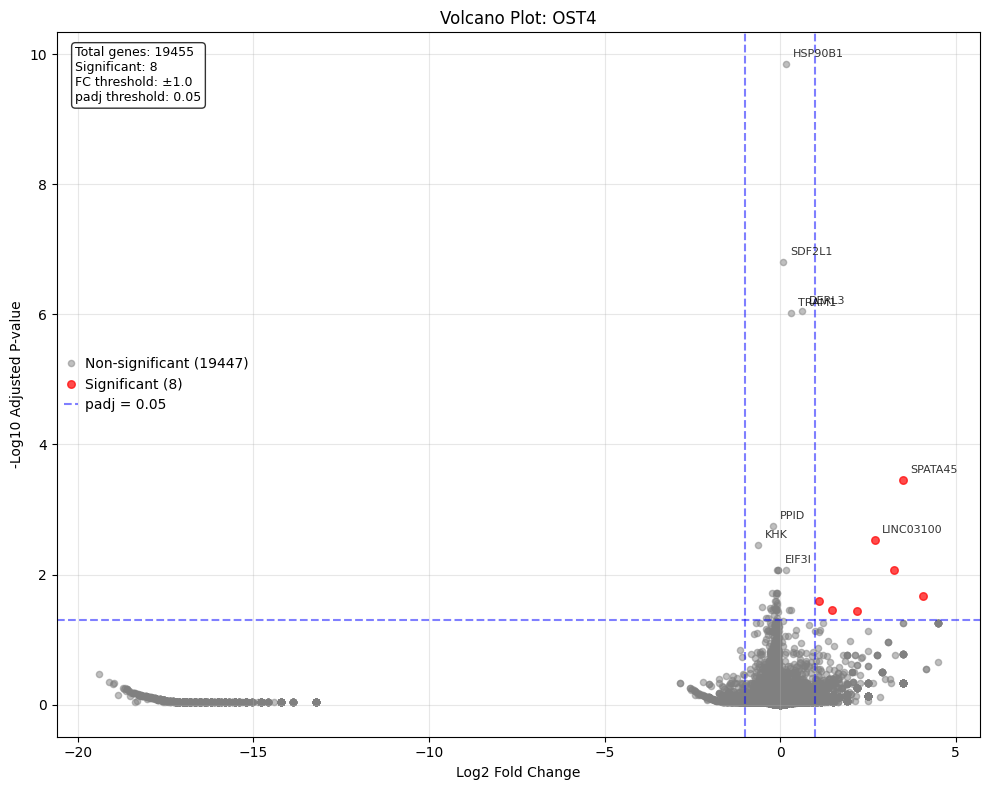


Summary for OST4:
  Total genes plotted: 19455
  Significant genes: 8
  Mean |log2FC|: 3.369
  Min padj: 0.00e+00
  Top significant gene: OST4 (padj=0.00e+00)


In [17]:
# Create volcano plot for a specific perturbation
plot_volcano_plot(results, perturbed_targets[0])

In [18]:
# Save results
results.to_csv(f"{DATASET}.csv", index=False)